# **Caligraphy reader model with skealrn**

# **Data preparation**

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X = mnist.data
y = mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (70000, 784)
y.shape = (70000,)


On a 70 000 images dans notre table de données

Nous allons représenter certaines de ces images

In [20]:
import matplotlib.pyplot as plt

def plot_digits(image_data, num_rows=1, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image_data[i].reshape(28, 28), cmap="binary")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

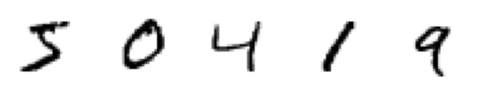

In [21]:
plot_digits(X[:5])

In [33]:
digit=X[0]
for i in range(5):
  print(y[i])

5
0
4
1
9


Les valeurs sont bien celles des images ci-dessus

# **Data Split**

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000]

# **Binary classifier training**

On simplifie le problème dans un premier temps et on se contente de reconnaitre les '5'

In [28]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [31]:
from sklearn.linear_model import SGDClassifier
binary_classifier = SGDClassifier(random_state=42)
binary_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

on le test sur X[0] car on sait que c'est un 5

In [35]:
binary_classifier.predict([digit])

array([ True])

Il détecte en effet que c'est un 5